<a href="https://colab.research.google.com/github/EinarLop/100OriginalInventorySystem/blob/master/ToyModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install torch_geometric (everything else is pre-installed in Colab
# Add more rows if woring from Pycharm etc.)
!pip install torch_geometric
#Unzip the archive with data
#!unzip results.zip

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import glob
import numpy as np

In [ ]:
# Red all matrix files and convert them into a list of lists
mat_files = sorted(glob.glob('/content/*.mat'))
if 'config_1.mat' in mat_files:
    mat_files.remove('config_1.mat')

all_matrices = []
for path in mat_files:
  with open(path, 'r') as f:
    content = f.read()
  # Remove the first and last character ('[' and ']')
  content = content[1:-1]
  string_list = []
  current_row = ''
  start_line = False
  for c in content:
      if c == '[':
          start_line = True
      elif c == ']':
          start_line = False
          string_list.append(current_row)
          current_row = ''
      elif start_line:
          if c != '\n':
              current_row += c
  matrix = []
  for string in string_list:
    vals = string.replace('.', ' ').split()
    vals = [int(v) for v in vals]
    matrix.append(vals)
  all_matrices.append(matrix)

In [ ]:
print(all_matrices[0])
print(all_matrices[1])
print(all_matrices[2])

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Convert adjacency matrices into edge indices.
# An edge index is a 2 x Num_Of_Vert array. Here is an example
# [[ 1, 2, 2, 3],
#  [ 2, 1, 3, 2]]
# You read the list by pairing numbers from top row with numbers from bottom row
# In this example, 1 connects to 2, 2 connects to 1, 2 connects to 3,
# and 3 connects to 2.
# PyTorch Geometric works with this format of edge connection

# List to hold edge indices for all indices
all_edge_indices = []

# Process each matrix in the list
for matrix in all_matrices:
    # Convert the 2D list to a numpy array
    matrix_np = np.array(matrix)

    # Get the indices where there are edges (i.e., non-zero entries)
    edge_indices = np.nonzero(matrix_np)

    # Stack the indices into a 2xN array where each column represents an edge
    edge_index = torch.tensor(np.vstack(edge_indices), dtype=torch.long)

    # Append the edge_index tensor to the list
    all_edge_indices.append(edge_index)

In [ ]:
# Read target values from rel files
rel_files = sorted(glob.glob('/content/*.rel'))
all_rels = []
if 'config_1.rel' in mat_files:
    mat_files.remove('config_1.rel')
for path in rel_files:
  with open(path, 'r') as f:
    y_val = float(f.read())
  all_rels.append(y_val)
# Convert the list of float values to a PyTorch tensor
all_rels_tensor = torch.tensor(all_rels)


In [ ]:
all_rels_tensor.shape

torch.Size([220])

In [ ]:
print(len(mat_files))
print(len(rel_files))

220
220


In [ ]:
print(all_matrices[0][3])
print(all_rels[0])

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.9870956549289328


In [ ]:
#Create one Data object per graph and put them into one list
# TODO: Create PyTOrch Geometric Dataset object (https://pytorch-geometric.readthedocs.io/en/latest/tutorial/create_dataset.html)
# Each Data object should have node features in a tensor called X,
# (we dont' have any node features yet, that's why there are placeholders)
# target tensor called Y, and edge_index from before.
data_list = []
for i in range(len(all_matrices)):
  num_nodes = len(all_matrices[i])  # Number of nodes from adjacency matrix
  node_features = torch.ones((num_nodes, 1))  # Dummy feature of 1.0 for each node
  edge_index = all_edge_indices[i]
  #TODO: there is one less rel file than mat files. It is because config1 (empty config)
  #Does not have corresponding rel value (which makes sense because empty system doesnt have reliability)
  #Because of that there is one less y valye than x values. I think the easest way to fix this
  #is by removing config1.mat entirely, but I am irested in your thoughts - Pasha
  y = all_rels_tensor[i]

  data = Data(x=node_features, edge_index=edge_index, y=y)
  data_list.append(data)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data and create DataLoader objects for training
train_data_list, test_data_list = train_test_split(data_list, test_size=0.2, random_state=42)
train_loader = DataLoader(train_data_list, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data_list, batch_size=32, shuffle=False)

In [ ]:
# Define a GCN (this one is from PyTorch Geometric tutorial, feel free to experiment)
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class GCN(torch.nn.Module):
    def __init__(self, num_node_features = 1):
        super().__init__()
        self.conv1 = GCNConv(num_node_features, 32)
        self.conv2 = GCNConv(32, 16)
        self.conv3 = GCNConv(16, 8)
        self.fc = torch.nn.Linear(8, 1)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        # First GCN layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        # Second GCN layer
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # Third GCN layer
        x = self.conv3(x, edge_index)
        x = F.sigmoid(x)

        # Global mean pooling to get graph-level representation
        x = global_mean_pool(x, batch)  # Shape: [batch_size, hidden_channels]

        # Final fully connected layer
        x = self.fc(x)  # Shape: [batch_size, 1]

        return x

In [ ]:
import torch.optim as optim
import time

# Initialize the model, optimizer, and loss function
model = GCN()  # Since our node features have dimension 1
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

# Training parameters
num_epochs = 20

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for data in train_loader:
        optimizer.zero_grad()
        out = model(data).squeeze()  # Shape: [batch_size]
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs  # Accumulate loss

    avg_train_loss = total_loss / len(data_list)
    # Validation Phase
    model.eval()
    total_val_loss = 0

    # Prediction time
    total_predictions = 0
    total_prediction_time = 0
    total_val_loss = 0

    with torch.no_grad():
        for data in test_loader:

            # Start time
            batch_start_time = time.time()

            out = model(data).squeeze()

            # End time
            batch_end_time = time.time()
            batch_prediction_time = batch_end_time - batch_start_time
            total_prediction_time += batch_prediction_time

            total_predictions += data.num_graphs

            loss = criterion(out, data.y)
            total_val_loss += loss.item() * data.num_graphs

    avg_val_loss = total_val_loss / len(test_data_list)
    avg_prediction_time = total_prediction_time / total_predictions

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Average Prediction Time (s): {avg_prediction_time:.6f} per graph\n')



Epoch 1/20, Training Loss: 0.4624, Validation Loss: 0.2081, Average Prediction Time (s): 0.000449 per graph

Epoch 2/20, Training Loss: 0.0707, Validation Loss: 0.0007, Average Prediction Time (s): 0.000304 per graph

Epoch 3/20, Training Loss: 0.0224, Validation Loss: 0.0457, Average Prediction Time (s): 0.000335 per graph

Epoch 4/20, Training Loss: 0.0342, Validation Loss: 0.0079, Average Prediction Time (s): 0.000156 per graph

Epoch 5/20, Training Loss: 0.0081, Validation Loss: 0.0109, Average Prediction Time (s): 0.000235 per graph

Epoch 6/20, Training Loss: 0.0112, Validation Loss: 0.0028, Average Prediction Time (s): 0.000284 per graph

Epoch 7/20, Training Loss: 0.0051, Validation Loss: 0.0011, Average Prediction Time (s): 0.000781 per graph

Epoch 8/20, Training Loss: 0.0059, Validation Loss: 0.0008, Average Prediction Time (s): 0.000416 per graph

Epoch 9/20, Training Loss: 0.0047, Validation Loss: 0.0003, Average Prediction Time (s): 0.000162 per graph

Epoch 10/20, Traini

Mean Squared Error on Test Set: 0.0002


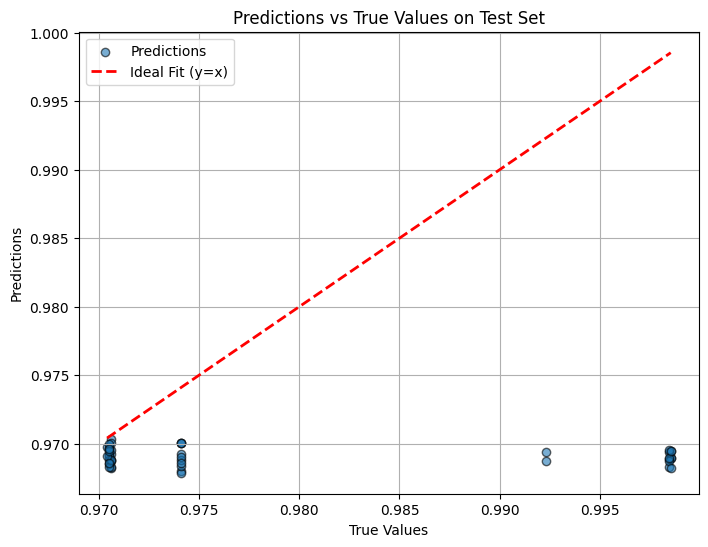

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Evaluate on test data
model.eval()
predictions = []
true_values = []

with torch.no_grad():
    for data in test_loader:
        out = model(data).squeeze()  # Predictions from the model
        predictions.append(out.cpu().numpy())  # Append predictions
        true_values.append(data.y.cpu().numpy())  # Append true values

# Flatten the lists
predictions = [item for sublist in predictions for item in sublist]
true_values = [item for sublist in true_values for item in sublist]

# Calculate Mean Squared Error
mse = mean_squared_error(true_values, predictions)

print(f'Mean Squared Error on Test Set: {mse:.4f}')

# Scatter Plot for Predictions vs True Values
plt.figure(figsize=(8, 6))
plt.scatter(true_values, predictions, alpha=0.6, edgecolor='k', label='Predictions')
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)],
         'r--', lw=2, label='Ideal Fit (y=x)')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values on Test Set')
plt.legend()
plt.grid()
plt.show()


In [ ]:
print(predictions)
print(true_values)

[0.969402, 0.96802676, 0.9689284, 0.96879584, 0.9692227, 0.9688719, 0.97035414, 0.9678865, 0.96822965, 0.96924555, 0.9683227, 0.96849465, 0.96911657, 0.9683017, 0.96836805, 0.9700283, 0.9695167, 0.968732, 0.96918637, 0.96879345, 0.96828824, 0.9694589, 0.9697381, 0.96883756, 0.9687476, 0.96972555, 0.96896523, 0.9700248, 0.96882594, 0.96908164, 0.9693861, 0.9685872, 0.9695703, 0.97000223, 0.9690665, 0.96874386, 0.96945715, 0.96860784, 0.9700368, 0.9700376, 0.9682055, 0.9695857, 0.968975, 0.96947926]
[0.99232566, 0.9741193, 0.9985338, 0.97060835, 0.97060835, 0.9984458, 0.97060835, 0.9741193, 0.97060835, 0.9741193, 0.9984458, 0.97051364, 0.97051364, 0.97060835, 0.9741193, 0.9741193, 0.97060835, 0.97060835, 0.97051364, 0.97051364, 0.97051364, 0.9985338, 0.9704145, 0.97060835, 0.99232566, 0.97051364, 0.9985338, 0.97060835, 0.9741193, 0.9704145, 0.9984458, 0.97051364, 0.9984458, 0.97051364, 0.9741193, 0.9984458, 0.97051364, 0.9741193, 0.9741193, 0.9741193, 0.9985338, 0.97051364, 0.9984458, 0.